# COGS 108 - An Analysis of the Effect of Commute Time on UCSD Students

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

Housing at UCSD has been a highly prominent topic recently, most specifically due to the large amount of students that were required to find off-campus housing this year. In this project, we set out to analyze data to research the tentative relationship between commute time to campus and sleep time for current UCSD students. The data that we used were collected directly from UCSD students through a Google Form and analyzed through linear regression. Overall, our results show that there is a statistically significant correlation between commute time and sleep time for current students, even after accounting for the probable effects of a student's year affecting hours of sleep. 

# Names

- Kaushika Uppu
- Lorenzo Topacio
- Jacob Zhong
- Jialin Yan
- Yu-Jung Lin

<a id='research_question'></a>
# Research Question

Is there a correlation between student commute time and the amount of sleep they get per night?

<a id='background'></a>

## Background & Prior Work

We chose this topic because the housing situation this year changed dramatically from the previous year due to the pandemic. Many students are forced to leave the campus, resulting in an increase in commuting time. For this reason, we would like to know whether student's sleep time will be affected by commuting time.

Due to the increasing popularity of vaccines, the restrictions of the United States government on international students were lifted, and most fall classes in UCSD were offered in a hybrid format making many students choose to go back to school after staying in lock down for over a year. UCSD has increased the number of students enrolled without increasing the housing, and additionally limited the housing. Due to COVID-19, and an influx in the number of students living on campus, UCSD adopted a lottery mode, where a computer generated list of second year students were guaranteed beds and the students left off of that list were forced to find off campus housing. If students live far away from school, students who take public transport need to spend more time waiting or on the way to campus. For those students who drive to school, because of the limited parking spaces on campus, they need to spend more time looking for parking lots. The increase of commuting time leads to the decrease of sleep time. In addition, many students' classes are usually scheduled in the morning, which is also the reason for the increased commuting time, because traffic is more crowded in the morning. So they need to get up earlier than students who live on campus, which also reduces their sleep time.

We will collect data in the form of a questionnaire/survey from students directly. This data is important as it will give not only direct data and numbers from affected students, but also allow us to see just how much this situation is affecting our fellow classmates.

References (include links):

1) https://www.lajollalight.com/news/story/2021-07-18/got-a-spare-apartment-thousands-of-uc-san-diego-students-need-a-place-to-live

2) https://ucsdguardian.org/2021/07/22/ucsd-students-express-frustration-with-new-campus-housing-lottery-system/

3) https://triton.news/2018/11/life-as-a-first-year-commuter/

4) https://pubmed.ncbi.nlm.nih.gov/24152062/

5) https://transportation.ucsd.edu/_files/parking/QPASS-FALL2021Week1Data.pdf

# Hypothesis


We hypothesize that students with a longer commute time will get less hours of sleep on average than students with a shorter commute time. We predict this based on the assumption that higher commuting times will cut into the limited time that students have to sleep on an average weekday.

# Dataset(s)

- Dataset Name: Response for Housing Survey
- Link to the dataset: https://docs.google.com/spreadsheets/d/1sj9oegTkMMYcSs4e1zMRUCEOOiSBoiCmBWQEqWshty0/edit?resourcekey#gid=1563854802
- Number of observations: 132

The dataset has the information on commute time and sleeping time gathered from UCSD students. Information includes distance from school, commute time, means of commute, and their average sleeping time on weekdays. We plan to anaylze the data and see if there is any relationship between commute time and average sleeping time.

# Setup

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [3]:
# read dataset as csv
df = pd.read_csv("Housing Survey.csv")
df.head()

,Timestamp,Have you read and agreed to the description?,What year are you?,"As of right now, what is your housing situation?","How far are you from campus? (miles, please set the destination to Geisel when looking up the distance, put 0 if on campus)",How do you commute to campus? (check all that apply),"How long is the commute time? (in minutes, including time taken to park vehicle if applicable)",How long do you sleep on an average weekday? (in hours)
0,11/4/2021 20:29:18,Yes,Senior,I live off-campus (includes living at home),1.9,"Bus, Walk",30.0,7.0
1,11/4/2021 21:06:45,Yes,Sophomore,I live on-campus,0.0,Walk,5.0,6.5
2,11/5/2021 9:53:05,Yes,Senior,I live off-campus (includes living at home),10.2,Drive,16.0,6.5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/1/2021 17:59:48,Yes,Senior,I live off-campus (includes living at home),1.9,"Bus, Walk",35.0,6.5


In [4]:
df.shape

(132, 8)

# Data Cleaning

The first step in our data cleaning process was to rename columns in our DataFrame for easier reading and comprehension. Second, we removed columns that were not relevant to our analysis. However, as we did have a question on our survey regarding consent, if consent was not given, the row was dropped. The consent column was then removed for easier viewing of the DataFrame, as all of the remaining rows had consent given.

In [5]:
# rename columns

temp = list(df.columns)
new_col = ['timestamp', 'consent', 'year', 'housing', 'distance', 'means of commute', 'commute', 'sleep']
new_name = {}
for i, j in zip(temp, new_col):
    new_name[i] = j

df = df.rename(columns=new_name)

df.head()

,timestamp,consent,year,housing,distance,means of commute,commute,sleep
0,11/4/2021 20:29:18,Yes,Senior,I live off-campus (includes living at home),1.9,"Bus, Walk",30.0,7.0
1,11/4/2021 21:06:45,Yes,Sophomore,I live on-campus,0.0,Walk,5.0,6.5
2,11/5/2021 9:53:05,Yes,Senior,I live off-campus (includes living at home),10.2,Drive,16.0,6.5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/1/2021 17:59:48,Yes,Senior,I live off-campus (includes living at home),1.9,"Bus, Walk",35.0,6.5


In [6]:
# remove unnecessary columns
df = df.drop('timestamp', axis=1)
try:
    df = df.drop(df['consent'] == 'no')
except:
    df = df.drop('consent', axis=1)
    

Third, rows with missing values `year`, `commute`, and `sleep` are dropped. Rows with missing values for other columns are kept because we only need `year`, `commute`, and `sleep` in the analysis.

In [7]:
# remove rows that contain NaN
# only remove data entry for year commute time and sleep time
df = df.dropna(axis=0, subset=['year', 'commute', 'sleep'])

In [8]:
df.head()

,year,housing,distance,means of commute,commute,sleep
0,Senior,I live off-campus (includes living at home),1.9,"Bus, Walk",30.0,7.0
1,Sophomore,I live on-campus,0.0,Walk,5.0,6.5
2,Senior,I live off-campus (includes living at home),10.2,Drive,16.0,6.5
4,Senior,I live off-campus (includes living at home),1.9,"Bus, Walk",35.0,6.5
5,Senior,I live off-campus (includes living at home),1.4,Drive,10.0,8.0


Fourth, data for `housing` is simplified to `off-campus` and `on-campus`. The means of commute were also modified so its easier to read in the table.

In [9]:
# replace input
df = df.replace({'I live off-campus (includes living at home)':'off-campus', 'I live on-campus':'on-campus'})
df.head()

,year,housing,distance,means of commute,commute,sleep
0,Senior,off-campus,1.9,"Bus, Walk",30.0,7.0
1,Sophomore,on-campus,0.0,Walk,5.0,6.5
2,Senior,off-campus,10.2,Drive,16.0,6.5
4,Senior,off-campus,1.9,"Bus, Walk",35.0,6.5
5,Senior,off-campus,1.4,Drive,10.0,8.0


In [10]:
df = df.replace({';':','})
df.head()

,year,housing,distance,means of commute,commute,sleep
0,Senior,off-campus,1.9,"Bus, Walk",30.0,7.0
1,Sophomore,on-campus,0.0,Walk,5.0,6.5
2,Senior,off-campus,10.2,Drive,16.0,6.5
4,Senior,off-campus,1.9,"Bus, Walk",35.0,6.5
5,Senior,off-campus,1.4,Drive,10.0,8.0


In [11]:
# function for replacing semi-colons in 'means of commute' column
def replacesemicolon(str_in):
    try:
        str_in = str_in.lower().strip()

        if ';' in str_in:
            str_in = str_in.replace(';', ', ')
            output = str_in
        else:
            output = str_in
    except:
        output = str_in
        
    return output

In [12]:
# replacing semi-colons
df['means of commute'] = df['means of commute'].apply(replacesemicolon)
df.head()

,year,housing,distance,means of commute,commute,sleep
0,Senior,off-campus,1.9,"bus, walk",30.0,7.0
1,Sophomore,on-campus,0.0,walk,5.0,6.5
2,Senior,off-campus,10.2,drive,16.0,6.5
4,Senior,off-campus,1.9,"bus, walk",35.0,6.5
5,Senior,off-campus,1.4,drive,10.0,8.0


The value of `year` column is change to numerical so that it can be used in linear regression analysis.

In [13]:
# function for making strings lowercase and change to numeric value
def replace_year(str_in):
    try:
        str_in = str_in.lower().strip()
        
        if 'freshman' in str_in:
            output = str_in.replace('freshman', '1')
        elif 'sophomore' in str_in:
            output = str_in.replace('sophomore', '2')
        elif 'junior' in str_in:
            output = str_in.replace('junior', '3')
        elif 'senior' in str_in:
            output = str_in.replace('senior', '4')
        elif 'graduate' in str_in:
            output = str_in.replace('graduate', '5')
        else:
            output = str_in
    
        if output.isnumeric():
            output = int(output)
        else:
            output = np.nan
    except:
        output = np.nan
    return output

In [14]:
# function test
temp = replace_year('freshman')
temp2 = replace_year('hiiii')
temp3 = replace_year('nan')
temp, temp2, temp3

(1, nan, nan)

In [15]:
# making year lowercase
df['year'] = df['year'].apply(replace_year)
df.head()

,year,housing,distance,means of commute,commute,sleep
0,4,off-campus,1.9,"bus, walk",30.0,7.0
1,2,on-campus,0.0,walk,5.0,6.5
2,4,off-campus,10.2,drive,16.0,6.5
4,4,off-campus,1.9,"bus, walk",35.0,6.5
5,4,off-campus,1.4,drive,10.0,8.0


`dropna` is performed again to remove missing values from `year`, `commute`, and `sleep` columns after the conversion functions are applied.

In [16]:
# remove rows that contain NaN
# only remove data entry for year commute time and sleep time
df = df.dropna(axis=0, subset=['year', 'commute', 'sleep'])

In [17]:
df.shape

(131, 6)

# Data Analysis & Results

We first wanted to see a general overview of the data that we collected.

In [18]:
df.describe()

,year,distance,commute,sleep
count,131.000000,131.000000,131.000000,131.000000
mean,3.229008,3.845038,22.616794,7.083969
std,1.027056,5.158387,17.367796,1.086902
min,1.000000,0.000000,0.100000,4.000000
25%,3.000000,1.300000,15.000000,6.000000
50%,4.000000,2.000000,20.000000,7.000000
75%,4.000000,3.500000,30.000000,8.000000
max,5.000000,30.000000,160.000000,10.000000


The scatter matrix below shows the relationships between the four variables we have in the data: year, distance from campus, commute time, and sleep.

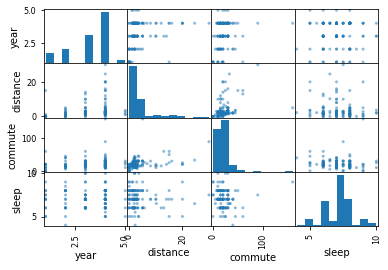

In [19]:
fig = pd.plotting.scatter_matrix(df)

Next, we wanted to checkout the distributions of the two variables that we are focusing on: sleep time and commute time.

Text(0.5, 1.0, 'Sleep Time Distribution')

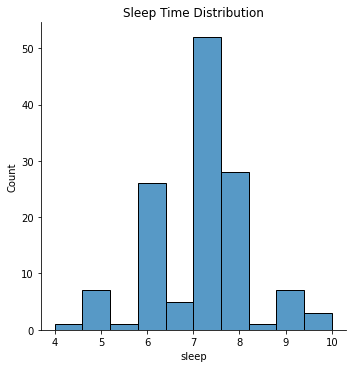

In [20]:
# sleep time
sns.displot(df['sleep'], bins = 10)
plt.title('Sleep Time Distribution')

Text(0.5, 1.0, 'Commute Time Distribution')

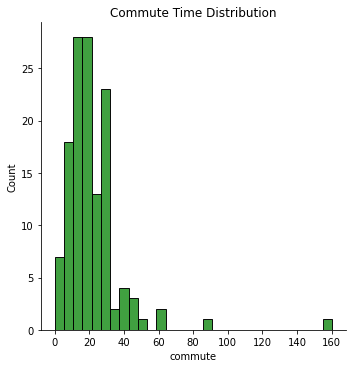

In [21]:
# commute time
sns.displot(df['commute'], bins = 30, color = 'green')
plt.title('Commute Time Distribution')

As seen in the two plots above, while sleep time has a pretty normal distribution, commute time is skewed right heavily, with a couple of outliers on the far right of the plot. To make the analysis more accurate, we will be removing the outliers in the data, which are the two data with values above 80. After removing the outliers, we regenerated the plot for commute time and sleep time again.

In [22]:
# remove outlier from commute dataset
# from the plot above we can see that outlier is greater than 100
# remove any commute time thats longer than 80 min

df = df[df['commute'] < 80]

In [23]:
# check if rows has been removed
df.shape

(129, 6)

Text(0.5, 1.0, 'Commute Time Distribution Without Outliers')

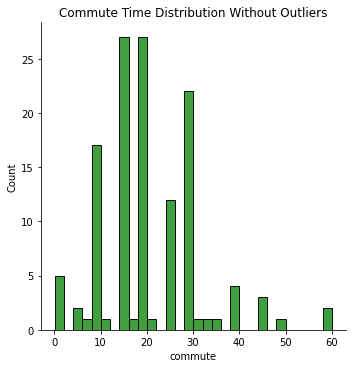

In [24]:
# regenerate the plot
sns.displot(df['commute'], bins = 30, color = 'green')
plt.title('Commute Time Distribution Without Outliers')

Text(0.5, 1.0, 'Sleep Time Distribution Without Outliers')

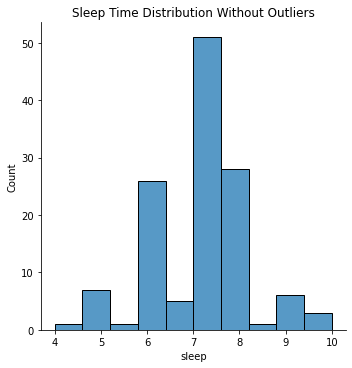

In [25]:
# regenerate sleep plot
sns.displot(df['sleep'], bins = 10)
plt.title('Sleep Time Distribution Without Outliers')

After regenerating the plots, we can see that the distribution of sleep time does not change much while the commute time distribution moved to the center.  
Next, we obtained data of `year`, `commute`, and `sleep` from the dataset to perform t-tests to anaylze the relationships between all three of these factors.

In [25]:
#overall year, commute and sleep time
year = df['year']
com = df['commute']
sleep = df['sleep']

#overall avg
avg_c = np.mean(df['commute'])
avg_s = np.mean(df['sleep'])

In [26]:
avg_c, avg_s

(21.029457364341084, 7.065891472868217)

In [27]:
#t-test for overall sleep time and commute time
t_1, p_1 = ttest_ind(a=sleep, b=com)
t_1, p_1

(-14.35523731791673, 1.1026894141596651e-34)

In [28]:
#t-test for overall year and commute
t_2, p_2 = ttest_ind(a=year, b=com)
t_2, p_2

(-18.320106343604085, 1.7858975243690324e-48)

In [29]:
#t-test for overall year and sleep
t_3, p_3 = ttest_ind(a=year, b=sleep)
t_3, p_3

(-29.26448264759551, 1.2203908369272774e-83)

From the three t-tests performed above, we can see that p-values of all of the tests are less than 0.05, which suggests that the null hypothesis should be rejected. Therefore, we can conclude that there is a correlation between commute time and sleep time of students. However, we wanted to further analyze the relationships between commute and sleep time, so we performed linear regressions on the data.

In [30]:
# linear regression predicting sleep time from commute time 
outcome1, predictors1 = patsy.dmatrices('sleep ~ commute', df)
mod1 = sm.OLS(outcome1, predictors1)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     6.669
Date:                Thu, 09 Dec 2021   Prob (F-statistic):             0.0109
Time:                        11:36:38   Log-Likelihood:                -189.34
No. Observations:                 129   AIC:                             382.7
Df Residuals:                     127   BIC:                             388.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5279      0.202     37.321      0.0

The equation for sleep is equal to -0.0011 * commute + 7.1099, which means that for every one minute of increase in commute time, sleep time decreases by 0.0011 minutes. Also, the p-value for this linear model is 0.011, which means that this correlation is statistically significant. We plotted the two variables below, along with the regression line.

Text(0.5, 1.0, 'Regression Line')

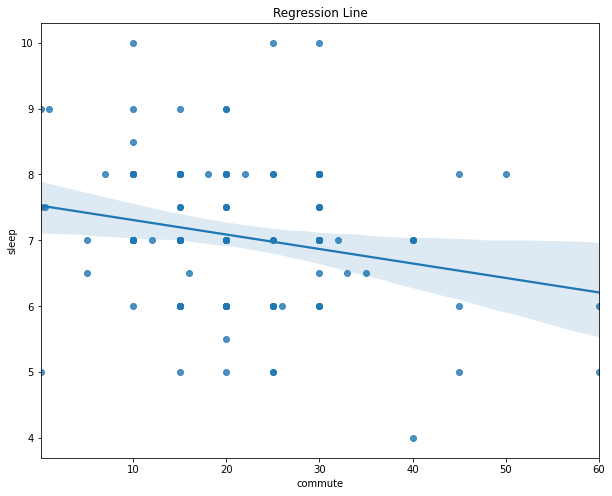

In [31]:
# plot the relationship between sleep time and commute time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
sns.regplot(x = 'commute', y = 'sleep', data = df).set_title('Regression Line')

We can see from this graph that the relationship between the two variables, `sleep time` and `commute time`, is not very strong, causing the slope of the regression line to be nearly 0, with a slight negative correlation.  

Next, we added `year` as the 2nd predictor in the new linear regression so we can examine if `year` is the reason why the relationship between `sleep` and `commute time` is weak.

In [32]:
#linear regression for predicting commute time + year level to sleep time
outcome2, predictors2 = patsy.dmatrices('sleep ~ commute + year', df)
mod2 = sm.OLS(outcome2, predictors2)
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.822
Date:                Thu, 09 Dec 2021   Prob (F-statistic):             0.0245
Time:                        11:36:38   Log-Likelihood:                -188.84
No. Observations:                 129   AIC:                             383.7
Df Residuals:                     126   BIC:                             392.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2692      0.331     21.992      0.0

From the summary, we can see that `year` has p-values greater than 0.05 while the p-value of `commute` time is less than 0.05, which means the null hypothesis for `year` is accepted and the one for `commute` is rejected. Therefore, we can conclude that commute time significantly affects the sleep time and the year students are in does not affect the sleep time. From the two analyses we conducted, we can confidently say that commute time affects sleep time significantly.

# Ethics & Privacy

With our data science project, we collected our own data rather than using a pre-existing dataset online. We created a Google Form where we curated our own questions and then sent it out on various platforms to be answered by UCSD students. We were able to obtain a decent amount of responses from students which we were thankful for. To ensure absolute anonymity, we did not require our responders to put their names or any form of identification, and did not collect any idenitfying information such as their emails. This was because our responders were answering personal questions about themselves that regarded their commute time, sleep schedule, and living situation. We felt that omitting names would make our responders feel more comfortable in answering the multiple questions that were presented to them, and if we could get them to answer all the questions, that would yield the best data possible for our project. Additionally, we made sure to incorporate all the different responses in our analyses, rather than only selecting the responses that would produce the cleanest graphs or reduce the workload for the group in general.

# Conclusion & Discussion

When we first started this project, we hypothesized that students with longer commute times will experience less hours of sleep on average (weekly) than students with shorter commute times. After gathering and analyzing the data, our study showed that there is a significant correlation between commute time and hours of sleep experienced, meaning that student commute times do affect how long they sleep per night. 

For our study, we wanted to gather real data from UCSD students who go to campus so we decided to create our own dataset by creating a google survey and posting the survey on various social media platforms such as Discord, Reddit, and WeChat. In total we observed around 132 responses from students from varying grade levels. The survey created was looking for the year level of the student, how far away from campus the student lived, how long their commute time was, and how many hours of sleep they got on average for a weekday. With this data, we first plotted a bar graphs of sleep time and commute time to observe the distributions and identify any outliers.  Sleep time displayed a relatively normal distribution whereas the distribution of commute time is skewed to the right. Through displaying the distributions, we were able to see one outlier from two students in the commute time plot, however, our datapool is small and a bit limited due to how our data was gathered and the limited amount of responses we got. After removing outliers from the commute data set, the commute time distribution histogram plot was then regenerated and displayed a more normal distribution to help with analysis. 

Next, a t-test was performed using the data gathered in year, commute, and sleep times to analyze the relationship between the three factors. From the 3 t-tests, we saw that the p-values of the datasets were below 0.05, which suggests that one factor does significantly affect the other factor. But the p-value only tells us that the effects they (year, commute time, sleep time) have with each other is scientifically significant. We do not know if there is any relationship between the factors and more importantly, the relationship between commute time and sleep time. To further analyze the relationships between commute and sleep time, linear regression was performed on the data.

From the linear regression that we conducted with only sleep and commute time, we found a p-value that is less than 0.05, meaning that the correlation between sleep and commute time is statistically significant. However, we wanted to further test that by accounting for another possible variable that could affect sleep time: year in school. Therefore, we conducted another linear regression that took both year and commute time into consideration and it resulted in a p-value greater than 0.05 for year. We can thus conclude that while year does not significantly affect sleep time of current UCSD students, commute time does.

One limitation of our study was our relatively low number of observations that we analyzed, and if further studied, gathering data from a higher number of students would help us both in increasing the validity of our results and aiding us in generalizing our findings to a larger population. In addition, more factors that could affect sleep time could be studied in order to account for other possible causes. 

In conclusion, the results that we got from the data that we collected highlight one negative consequence that distant off-campus housing has on students, and emphasize one specific facet of the housing crisis that has overtaken UCSD. 

# Team Contributions

- Kaushika Uppu: Survey Questions, Overview, Conclusion and Discussion, EDA, Powerpoint
- Lorenzo Topacio: Survey Questions, Research question, Ethic and Privacy, EDA, Powerpoint, Presentation
- Jacob Zhong: Survey Questions, Conclusion and Discussion, EDA, Powerpoint, Presentation
- Jialin Yan: Survey Questions, Background and Prior work, Powerpoint
- Yu-Jung Lin: Survey Questions, Data cleaning, EDA, Powerpoint